# MNIST DCGAN Example - Result

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

####[MDR-01]
Import modules and set a random seed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import models

np.random.seed(20190618)
tf.set_random_seed(20190618)

Using TensorFlow backend.


####[MDR-02]
Mount your Google Drive on `/content/gdrive`.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####[MDR-03]
Confirm that the exported model file `MNIST_double.hd5` is on your Google Drive.

In [3]:
!ls -lh '/content/gdrive/My Drive/gan_generator.hd5'

-rw------- 1 root root 2.4M Jun 17 13:41 '/content/gdrive/My Drive/gan_generator.hd5'


####[MDR-04]
Restore the model from the exported model file.

In [4]:
model = models.load_model('/content/gdrive/My Drive/gan_generator.hd5')
model.summary()

W0617 13:49:33.229334 139642617276288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 13:49:33.234841 139642617276288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0617 13:49:33.331380 139642617276288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0617 13:49:33.332356 139642617276288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0617 13:49:33.333849 1396426172

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
expand (Dense)               (None, 6272)              407680    
_________________________________________________________________
leaky_relu1 (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
deconv1 (Conv2DTranspose)    (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_relu2 (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
deconv2 (Conv2DTranspose)    (None, 28, 28, 1)         1601      
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
Total para

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


####[MDR-05]
Define a function to show generated images.

In [0]:
def show_images(images):
  fig = plt.figure(figsize=(len(images)*1.4, 1.4))
  for c, image in enumerate(images):
    subplot = fig.add_subplot(1, len(images), c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='bilinear')

####[MDR-06]
Show some random images.

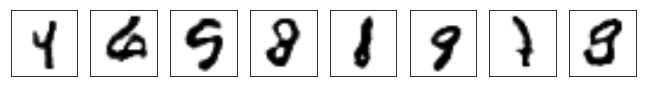

In [6]:
latent_dim = 64
random_inputs = np.random.rand(8, latent_dim) * 2.0 - 1.0
show_images(model.predict(random_inputs))

####[MDR-07]
Pick up two examples and generate interporated images.

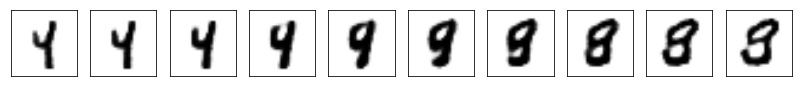

In [7]:
start, end = random_inputs[0], random_inputs[7]

interpolation = [np.linspace(s, e, 10) for s, e in zip(start, end)]
example = np.array([[x[c] for x in interpolation] for c in range(10)])
show_images(model.predict(example))

####[MDR-08]
Create an animation of dancing digits.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


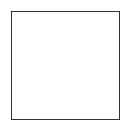

In [8]:
import matplotlib.animation as animation

x = np.random.rand(3, latent_dim) * 2.0 - 1.0
inputs = []
theta1, theta2 = 0, 0
for _ in range(64):
    theta1 += 2*np.pi / 64 * 2
    theta2 += 2*np.pi / 64
    inputs.append(np.cos(theta1) * x[0] + \
        np.sin(theta1)*(np.cos(theta2)*x[1] + np.sin(theta2)*x[2]))
res = model.predict(np.array(inputs))

images = []
fig = plt.figure(figsize=(2, 2))
for i in range(len(res)):
    subplot = fig.add_subplot(1, 1, 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    image = subplot.imshow(res[i].reshape((28, 28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation='bilinear')
    images.append([image])
ani = animation.ArtistAnimation(fig, images, interval=10, repeat=True)
ani.save('DCGAN_morphing.gif', writer='pillow', fps=100)

!cp DCGAN_morphing.gif /usr/local/share/jupyter/nbextensions/google.colab/

####[MDR-08]
Show the animation. (Note that the repeat flag of the GIF image doesn't work due to some problem for now.)

In [12]:
%%html
<img src='/nbextensions/google.colab/DCGAN_morphing.gif'/>